In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [40]:
df = pd.read_csv('../Jupyter-Data/marketing-train.csv')
df.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown


In [41]:
# Handling missing values (replace 'unknown' with NaN)
df.replace('unknown', float('NaN'), inplace=True)
df.fillna(0, inplace=True)
df.replace([np.inf, -np.inf], 0, inplace=True)

In [42]:
# Impute missing numerical values with the mean
# Columns with missing numerical values:'daySinceLastCampaign'

df['daySinceLastCampaign'].fillna(df['daySinceLastCampaign'].mean(), inplace=True)


# Impute missing categorical values with the most frequent value
# Columns with missing categorical values:  'job', 'education', 'contactType', 'lastCampaignResult'

df['job'].fillna(df['job'].mode().iloc[0], inplace=True)
df['education'].fillna(df['education'].mode().iloc[0], inplace=True)
df['contactType'].fillna(df['contactType'].mode().iloc[0], inplace=True)
df['lastCampaignResult'].fillna(df['lastCampaignResult'].mode().iloc[0], inplace=True)


In [43]:
print(df.isnull().sum())

id                              0
target                          0
day                             0
month                           0
duration                        0
contactId                       0
age                             0
gender                          0
job                             0
maritalStatus                   0
education                       0
creditFailure                   0
accountBalance                  0
house                           0
credit                          0
contactType                     0
numberOfContacts                0
daySinceLastCampaign            0
numberOfContactsLastCampaign    0
lastCampaignResult              0
dtype: int64


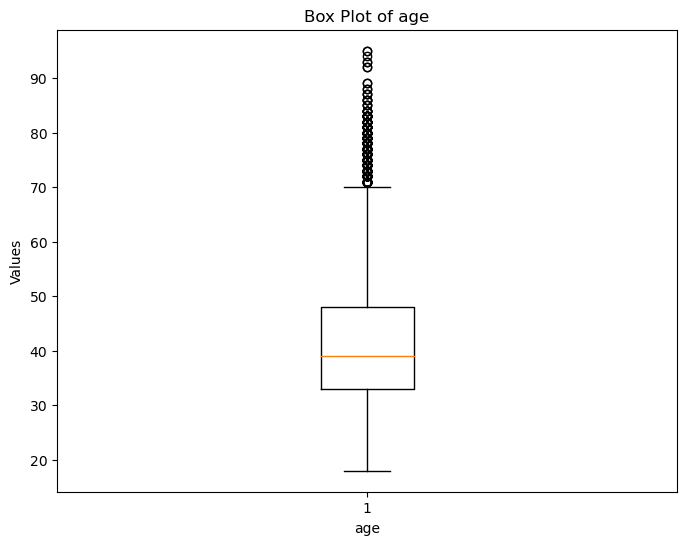

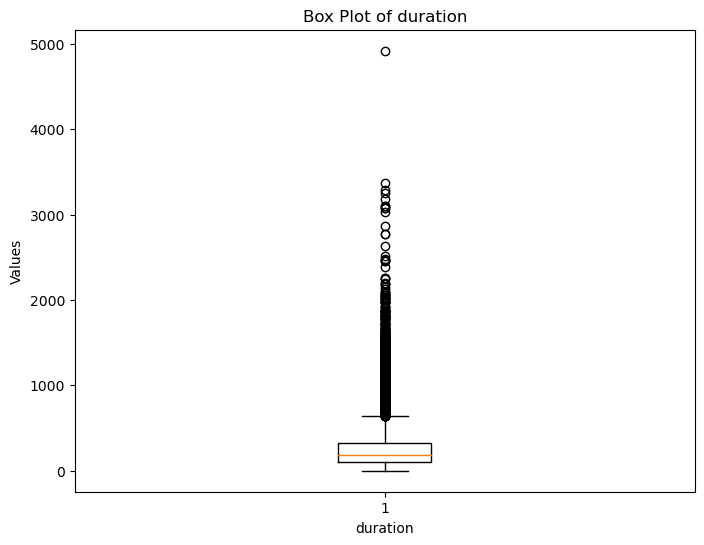

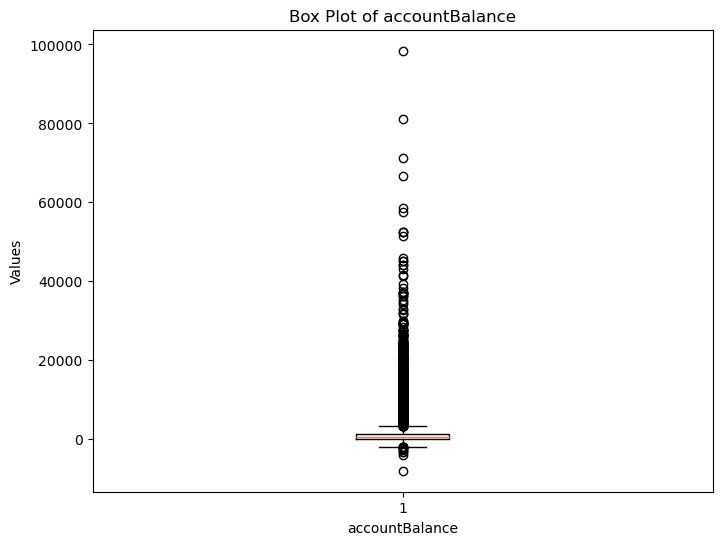

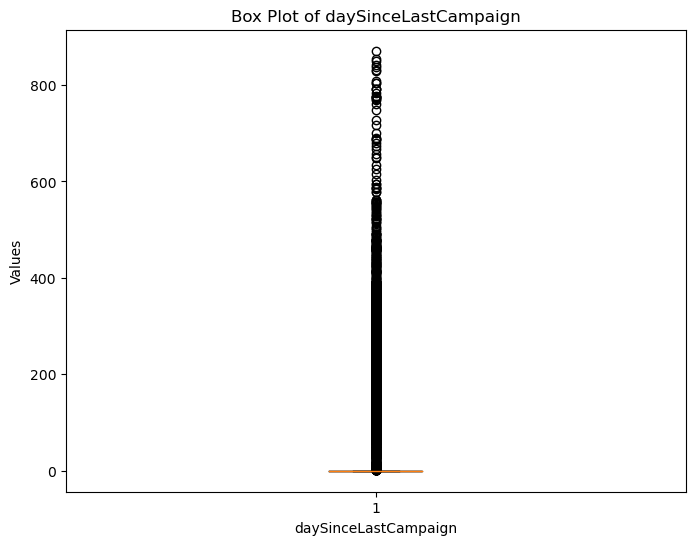

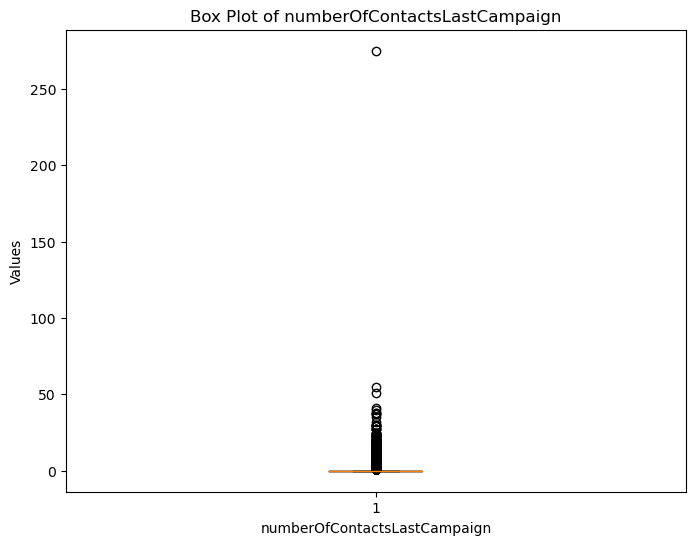

In [44]:
# List of columns to check for outliers (assuming numerical columns)
numerical_columns = ['age', 'duration', 'accountBalance', 'daySinceLastCampaign', 'numberOfContactsLastCampaign']

# Create a box plot for each numerical column to visualize outliers
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()

In [45]:
# Select the numeric columns for scaling
numeric_columns = ['day', 'duration', 'contactId', 'age', 'accountBalance', 'numberOfContacts', 'numberOfContactsLastCampaign']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [46]:
# Feature engineering - Date-related features
df['day_of_week'] = df['day'].map({1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'})
df['season'] = df['month'].map({'dec': 'Winter', 'jan': 'Winter', 'feb': 'Winter',
                                           'mar': 'Spring', 'apr': 'Spring', 'may': 'Spring',
                                           'jun': 'Summer', 'jul': 'Summer', 'aug': 'Summer',
                                           'sep': 'Autumn', 'oct': 'Autumn', 'nov': 'Autumn'})

# Drop the original 'day' and 'month' columns as they are no longer needed
df.drop(columns=['day', 'month'], inplace=True)

# One-hot encoding for categorical features
categorical_columns = ['gender', 'job', 'maritalStatus', 'education', 'creditFailure', 'house', 'credit', 'contactType', 'lastCampaignResult', 'day_of_week', 'season']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)


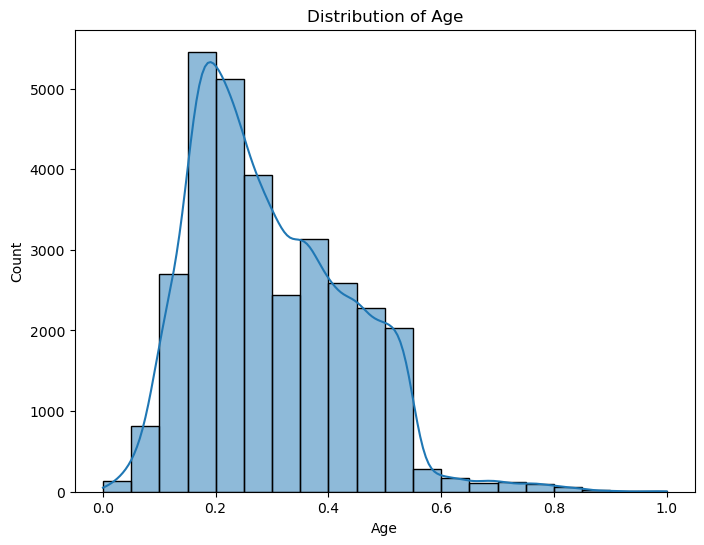

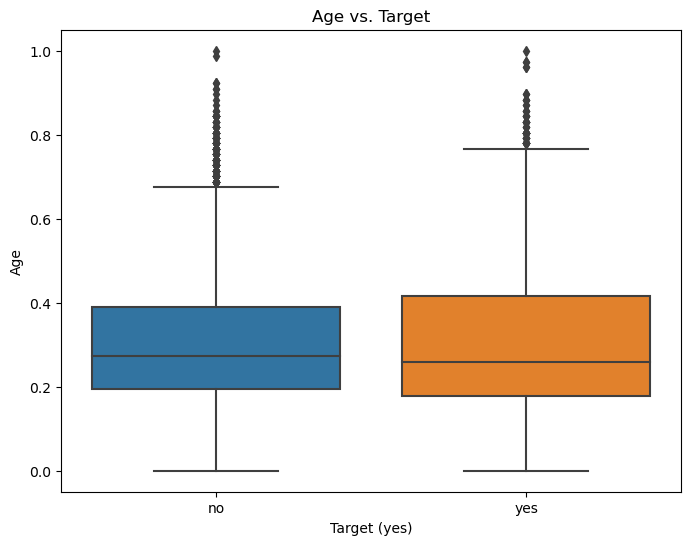

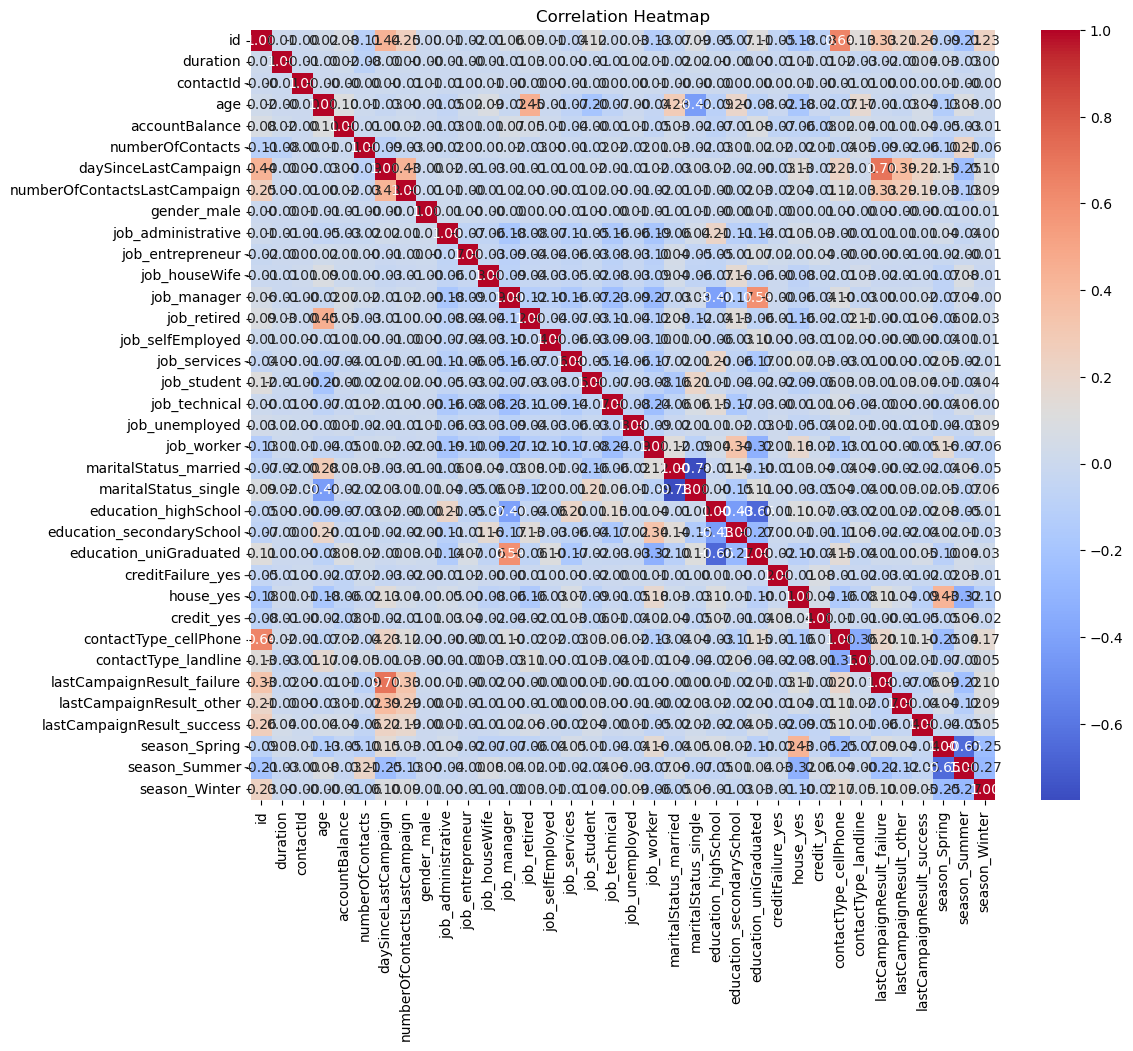

In [47]:
# Distribution of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Relationship between 'age' and 'target'
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title("Age vs. Target")
plt.xlabel("Target (yes)")
plt.ylabel("Age")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [48]:
# Separate features and target variable
X = df.drop(columns=['target'])
y = df['target']

# Split the data into 80% training and 20% validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode target variable: 'no' -> 0, 'yes' -> 1
y_train_encoded = y_train.map({'no': 0, 'yes': 1})
y_test_encoded = y_test.map({'no': 0, 'yes': 1})

In [50]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train_encoded)

# Make predictions on the testing data
y_pred_encoded = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred_encoded))
print("RMSE:", rmse)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
print("MAE:", mae)

Accuracy: 0.91
RMSE: 0.29717004916283357
MAE: 0.08831003811944091


In [51]:
# Initialize the logistic regression model
lr_model = LogisticRegression()

# Perform k-fold cross-validation with k=5
k_fold_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the average accuracy across all folds
average_accuracy = k_fold_scores.mean()

# Print the average accuracy
print("Average Accuracy (k-fold cross-validation):", average_accuracy)

# Train the model on the entire training data
lr_model.fit(X_train, y_train_encoded)

# Make predictions on the testing data
y_pred_encoded = lr_model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test_encoded, y_pred_encoded))
print("RMSE:", rmse)

# Calculate MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
print("MAE:", mae)

Average Accuracy (k-fold cross-validation): 0.8815120767164917
RMSE: 0.33722840735820575
MAE: 0.11372299872935197
